In [56]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [57]:
all_df = pd.read_csv("data/sensor.csv")

In [58]:
all_df[:4]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL


In [59]:
all_df.isnull().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_15            31
sensor_16            46
sensor_17            46
sensor_18            16
sensor_19            16
sensor_20            16
sensor_21            41
sensor_22            16
sensor_23            16
sensor_24            36
sensor_25            20
sensor_26            16
sensor_27            16
sensor_28            72
sensor_29           261
sensor_30            16
sensor_31            68
sensor_32            16
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            27
sensor_38            27
sensor_39            27
sensor_40       

In [60]:
all_df=all_df.drop(['sensor_00'], axis=1)
all_df=all_df.drop(['timestamp'], axis=1)
all_df=all_df.drop(['sensor_06'], axis=1)
all_df=all_df.drop(['sensor_07'], axis=1)
all_df=all_df.drop(['sensor_08'], axis=1)
all_df=all_df.drop(['sensor_09'], axis=1)
all_df=all_df.drop(['sensor_49'], axis=1)
all_df=all_df.drop(['sensor_50'], axis=1)

In [61]:
all_df['machine_status']= all_df['machine_status'].map({'NORMAL':0, 'BROKEN': 1, 'RECOVERING': 2}).astype(int)

In [62]:
all_df = all_df.dropna(how='any')

In [63]:
X=all_df.drop(['machine_status'], axis=1).values.astype('float64')

In [64]:
Y = all_df['machine_status'].values.astype('int64')

In [65]:
X.shape

(219521, 44)

In [66]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

175616

In [67]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [68]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [69]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [70]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [71]:
model = Sequential()

In [72]:
model.add(SimpleRNN(units=44, input_shape=(44,1)))

In [73]:
model.add(Dense(3, activation = "softmax"))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 44)                2024      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 135       
Total params: 2,159
Trainable params: 2,159
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [76]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 140492 samples, validate on 35124 samples
Epoch 1/60
140492/140492 [==============================] - 21s 153us/step - loss: 0.2665 - acc: 0.9086 - val_loss: 0.0888 - val_acc: 0.9774
Epoch 2/60
140492/140492 [==============================] - 29s 203us/step - loss: 0.0674 - acc: 0.9811 - val_loss: 0.0539 - val_acc: 0.9845
Epoch 3/60
140492/140492 [==============================] - 26s 182us/step - loss: 0.0485 - acc: 0.9849 - val_loss: 0.0377 - val_acc: 0.9879
Epoch 4/60
140492/140492 [==============================] - 27s 189us/step - loss: 0.0358 - acc: 0.9887 - val_loss: 0.0282 - val_acc: 0.9919
Epoch 5/60
140492/140492 [==============================] - 25s 178us/step - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0255 - val_acc: 0.9913
Epoch 6/60
140492/140492 [==============================] - 24s 171us/step - loss: 0.0259 - acc: 0.9920 - val_loss: 0.0209 - val_acc: 0.9937
Epoch 7/60
140492/140492 [==============================] - 31s 218us/step - loss: 0.0229 - acc: 0.9927

In [77]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

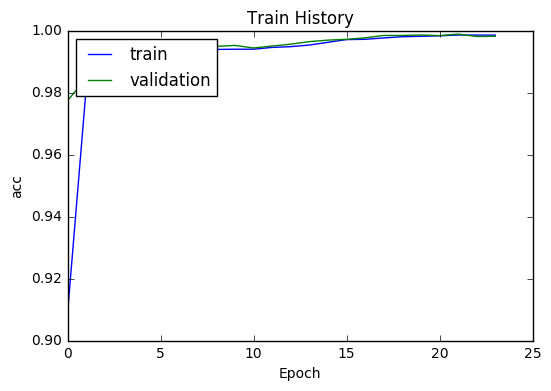

In [78]:
show_train_history(train_history,'acc','val_acc')

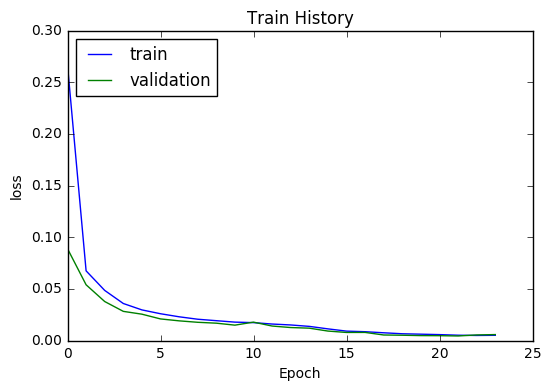

In [79]:
show_train_history(train_history,'loss','val_loss')

In [80]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

43905/43905 [==============================] - 7s 167us/step


In [81]:
scores[1]

0.9984056485593896